In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [52]:
df = pd.read_csv('Consumer_Complaints.csv')
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,03/21/2017,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,Company has responded to the consumer and the ...,EXPERIAN DELAWARE GP,TX,77075,Older American,NaN,Phone,03/21/2017,Closed with non-monetary relief,Yes,No,2397100
1,04/19/2017,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not disclosed as an attempt to collect,NaN,NaN,"Security Credit Services, LLC",IL,60643,NaN,NaN,Web,04/20/2017,Closed with explanation,Yes,No,2441777
2,04/19/2017,Credit card,NaN,Other,NaN,NaN,Company has responded to the consumer and the ...,"CITIBANK, N.A.",IL,62025,NaN,NaN,Referral,04/20/2017,Closed with explanation,Yes,No,2441830
3,04/14/2017,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,Company believes it acted appropriately as aut...,"Shellpoint Partners, LLC",CA,90305,NaN,NaN,Referral,04/14/2017,Closed with explanation,Yes,No,2436165
4,04/19/2017,Credit card,NaN,Credit determination,NaN,NaN,Company has responded to the consumer and the ...,U.S. BANCORP,LA,70571,NaN,NaN,Postal mail,04/21/2017,Closed with explanation,Yes,No,2441726


In [53]:
# get all the columns in the data 
cols = df.columns.tolist()
cols

['Date received',
 'Product',
 'Sub-product',
 'Issue',
 'Sub-issue',
 'Consumer complaint narrative',
 'Company public response',
 'Company',
 'State',
 'ZIP code',
 'Tags',
 'Consumer consent provided?',
 'Submitted via',
 'Date sent to company',
 'Company response to consumer',
 'Timely response?',
 'Consumer disputed?',
 'Complaint ID']

In [54]:
df['Product'].value_counts()

Mortgage                                                                        228167
Debt collection                                                                 148016
Credit reporting                                                                140405
Credit card                                                                      89189
Bank account or service                                                          86206
Student loan                                                                     33044
Consumer Loan                                                                    31591
Payday loan                                                                       5543
Money transfers                                                                   5355
Prepaid card                                                                      3817
Credit reporting, credit repair services, or other personal consumer reports      3490
Other financial service                    

#### Data Analysis 

Presenting the data for deep cleaning. Below are the steps we are going to take to carry an in-depth data cleansing.
- Data Cleaning/Quality Check
- Data Transformation
- Data 
- Data Modelling

In [55]:
# check for the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777959 entries, 0 to 777958
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 777959 non-null  object
 1   Product                       777959 non-null  object
 2   Sub-product                   542822 non-null  object
 3   Issue                         777959 non-null  object
 4   Sub-issue                     320986 non-null  object
 5   Consumer complaint narrative  157865 non-null  object
 6   Company public response       197884 non-null  object
 7   Company                       777959 non-null  object
 8   State                         772056 non-null  object
 9   ZIP code                      772001 non-null  object
 10  Tags                          109264 non-null  object
 11  Consumer consent provided?    288311 non-null  object
 12  Submitted via                 777959 non-null  object
 13 

From the table shown above, we can deduce that 98% of our dataset are catergorical variables. Complaint ID happens to be only numerical variable.

In [56]:
# calculate the total records in the data 
total_data_length = len(df)
print(f'The total records in our dataset is {total_data_length}')

The total records in our dataset is 777959


In [57]:
# check the missing states 
missing_states = df['State'].isnull().sum()
# missing_states

# percentage of missing states
percent = 100
missing_states_perc = (missing_states / total_data_length) * percent
print(f'There are {missing_states_perc:.2f}% states missing and it represents a small portion of the data')

There are 0.76% states missing and it represents a small portion of the data


In [58]:
# Descriptive summary characteristics 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Complaint ID,777959.0,1.310413e+06,728727.579489,1.0,691289.0,1353374.0,1956984.5,2488370.0


In [59]:
# get state count in the data
state = df['State'].value_counts()
# convert pandas series to dataframe
state_df = state.sort_values(ascending=True).to_frame()
state_df

,State
PW,12
AA,13
AS,25
MH,30
MP,31
...,...
GA,36889
NY,53161
TX,60400
FL,74507


In [77]:
len(df.loc[df['Tags'] != 'Servicemember'])

739579

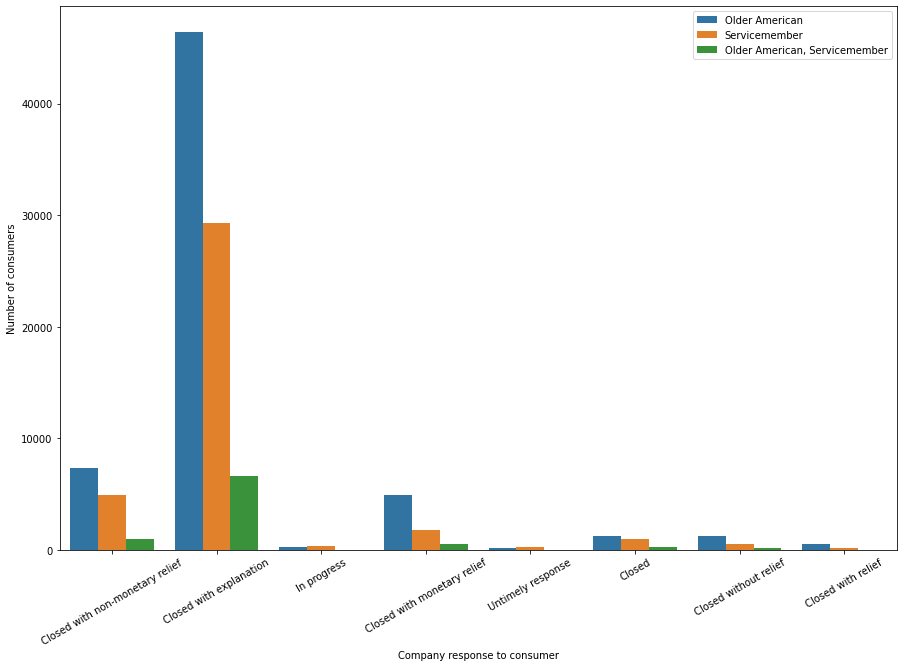

In [81]:
# df['Company response to consumer'].value_counts()
plt.figure(figsize=(15,10))
sns.countplot('Company response to consumer', hue='Tags', data=df)
plt.legend(loc='upper right')
plt.ylabel('Number of consumers')
plt.xticks(rotation=30)
plt.show()

In [71]:
# get the company details 
company_data = df['Company'].value_counts().to_frame()
# reset the index and changes the columns accordingly
company_data.reset_index().rename(columns={'index':'Company',
                                           'Company':'Frequency'}).head(10)

,Company,Frequency
0,"BANK OF AMERICA, NATIONAL ASSOCIATION",66314
1,"WELLS FARGO BANK, NATIONAL ASSOCIATION",54090
2,"EQUIFAX, INC.",49162
3,EXPERIAN DELAWARE GP,46896
4,JPMORGAN CHASE & CO.,42997
5,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",40752
6,"CITIBANK, N.A.",35028
7,OCWEN LOAN SERVICING LLC,24273
8,CAPITAL ONE FINANCIAL CORPORATION,20526
9,"Navient Solutions, LLC.",18384


The table above shows the information about all the companies located in United State. The top ten (10) companies with high volume of customer's complaints are from the financial sector.

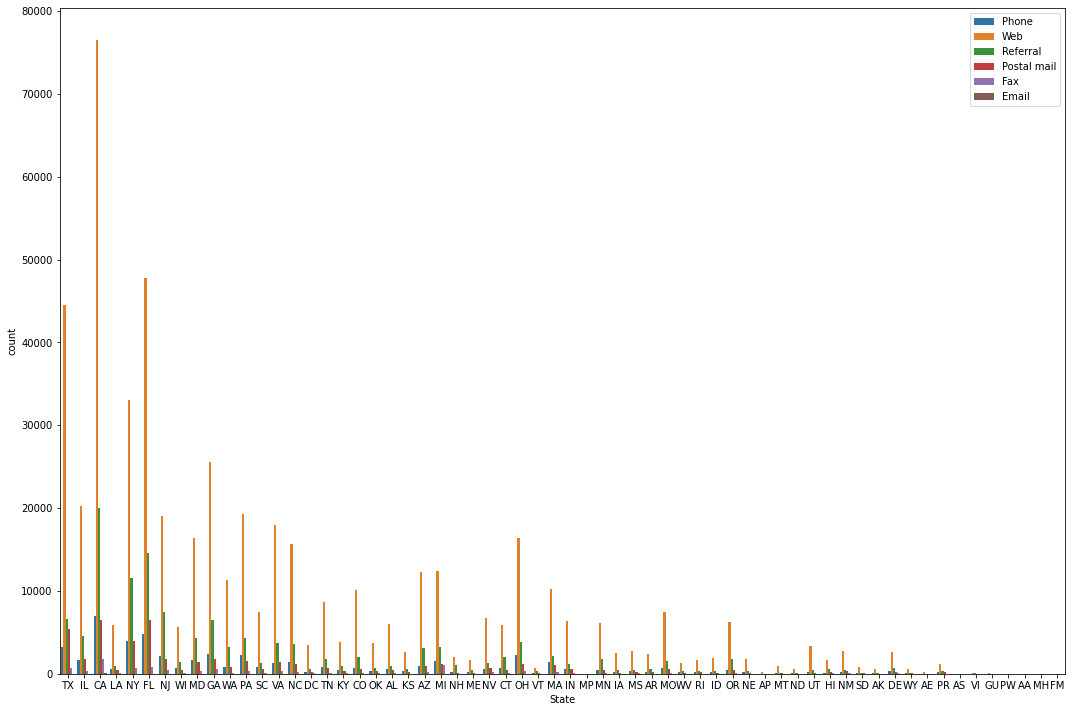

In [17]:
plt.figure(figsize=(15,10))
sns.countplot('State', data=df, hue='Submitted via')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [ ]:
# check data for missing data 
# df.isnull().sum()
# an array for columns with missing values 
cols_miss_values = []
for col in df.columns:
    if df[col].isnull().sum() > 0:
        cols_miss_values.append(col)
    
cols_miss_values
    
df[cols_miss_values]

,Sub-product,Sub-issue,Consumer complaint narrative,Company public response,State,ZIP code,Tags,Consumer consent provided?,Consumer disputed?
0,NaN,Information is not mine,NaN,Company has responded to the consumer and the ...,TX,77075,Older American,NaN,No
1,"Other (i.e. phone, health club, etc.)",Not disclosed as an attempt to collect,NaN,NaN,IL,60643,NaN,NaN,No
2,NaN,NaN,NaN,Company has responded to the consumer and the ...,IL,62025,NaN,NaN,No
3,Other mortgage,NaN,NaN,Company believes it acted appropriately as aut...,CA,90305,NaN,NaN,No
4,NaN,NaN,NaN,Company has responded to the consumer and the ...,LA,70571,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...
777954,NaN,NaN,NaN,NaN,NY,11743,NaN,NaN,No
777955,Other mortgage,NaN,NaN,NaN,NY,11423,NaN,NaN,No
777956,Other mortgage,NaN,NaN,NaN,DE,19803,NaN,NaN,No
777957,Conventional adjustable mortgage (ARM),NaN,NaN,NaN,MO,64053,NaN,NaN,Yes


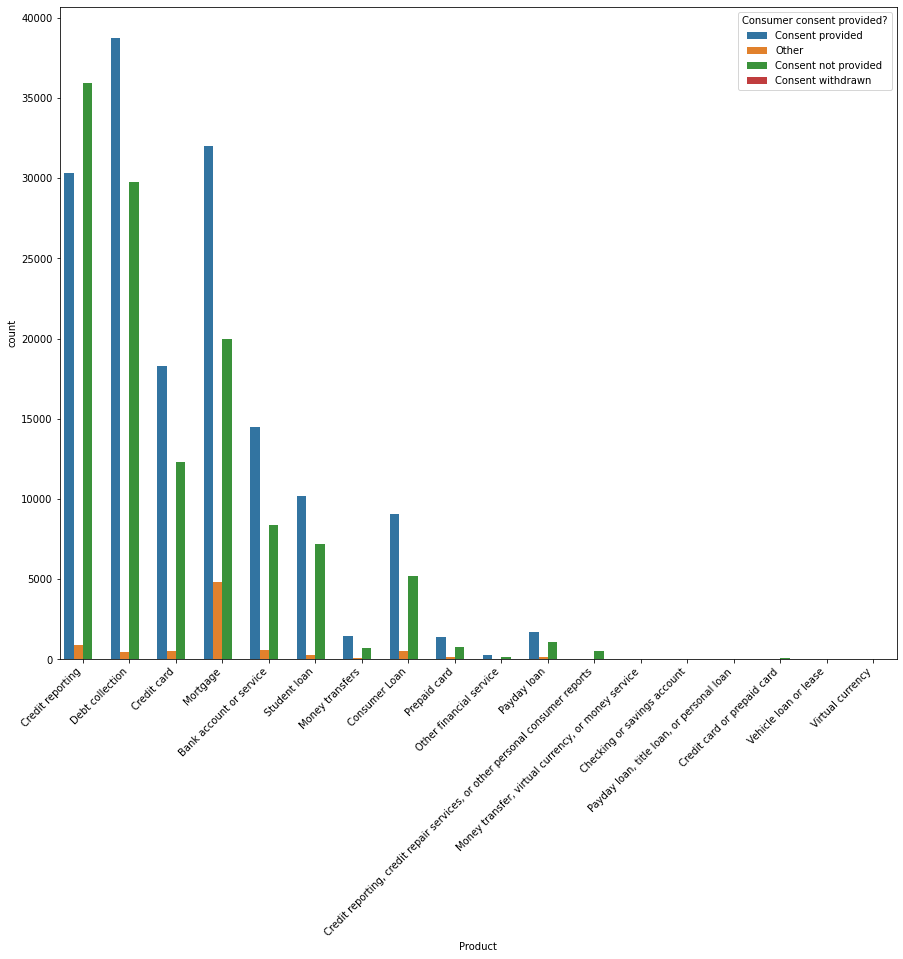

In [5]:
labels = list(df['Product'].unique())
plt.figure(figsize=(15,12))
ax = sns.countplot(df['Product'], hue=df['Consumer consent provided?'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.move_legend(ax, loc="upper right")
plt.show()

#  bbox_to_anchor=(.55, .45)

In [61]:
mask = df.columns.tolist()
cols = [col.replace(" ","_") for col in mask if col.startswith('D')]
cols

['Date_received', 'Date_sent_to_company']

In [1]:
df.columns

NameError: name 'df' is not defined